## **HACKTIV8 - BATCH 3 - FINAL PROJECT 2**
## **Membandingkan Model Classification Logistic Regression dengan Super Vector Machine untuk Prediksi Hujan**
### 1. Naila Qisthi Azzahra : PYTN-KS08-018
### 2. Alifia Mustika Sari : PYTN-KS08-010

## Introduction

#### **Problem Statement**
Prediksi cuaca khususnya hujan tentu sangat diperlukan, sehingga aktivitas manusia bisa menyesuaikan dengan cuaca tersebut seperti jadwal penerbangan, waktu tanam, jaringan telekomunikasi, dan masih banyak lagi. Dengan begitu maka resiko yang diakibatkan oleh kerugian tersebut bisa dikurangi atau dicegah 

#### **Objectives**


*   Untuk melihat feature apa saja yang berpengaruh besar terhadap prediksi hujan dihari besok
*   Untuk membandingkan akurasi antara model klasifikasi Logistic Regression dengan SVM



#### **Data Source**
Data yang digunakan untuk project ini merupakan data **Rain in Australia** yang bersumber dari Kaggle, data tersebut terdiri dari 23 features atau variabel yang dianggap mempunyai pengaruh terhadap terjadinya hujan harian selama 10 tahun pada Kota-Kota di Australia

## Import Library

In [1]:
#for data prepocessing
import pandas as pd
import numpy as np 

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for encoding categorical data
from sklearn.preprocessing import OrdinalEncoder #for encoding categorical data

#for splitting data into train and test
from sklearn.model_selection import train_test_split

#for building model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm

#for evaluating model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Loading

In [2]:
#Import Dataset
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#melihat tipe data untuk setiap kolom feature 
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

tipe variabel data mayoritas float (numerik) dan hanya beberapa variabel seperti Lokasi, Tanggal, Arah Angin yang bertipe kategorik.

In [4]:
#chck number of row and column
df.shape

(145460, 23)

dataset memiliki 145460 row data dan 23 features. Dengan 1 features merupakan variabel target yaitu Rain Tomorrow

In [5]:
#check missing value and data type sekaligus
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#check number of missing value from each feature
missing_values_count = df.isna().sum()
missing_values_count

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

variabel sunshine dan evaporation memiliki jumlah missing value paling banyak diantara yang lainnya, yaitu 60 ribu lebih data yang hilang

In [7]:
#calculate persentage of missing value
jml_cells = np.product(df.shape)
jml_missingvalue = missing_values_count.sum()
print("Jumlah Missing Value :", jml_missingvalue)
percentase_missingvalue= (jml_missingvalue/jml_cells)*100
print(percentase_missingvalue, "%")

Jumlah Missing Value : 343248
10.259745694319072 %


secara keseluruhan persentase data yang hilang adalah 10.26%

In [8]:
#check number of unique from categorical variabel
df.Location.nunique()
df.Location.unique()

49

In [9]:
#check number of unique from categorical variabel
df.WindGustDir.nunique()
df.WindGustDir.unique()

16

W : West

N : North

E : East

S : South

In [10]:
#check number of unique from categorical variabel
df.WindDir9am.nunique()
df.WindDir9am.unique()

16

W : West

N : North

E : East

S : South

In [11]:
#check number of unique from categorical variabel
df.WindDir3pm.nunique()
df.WindDir3pm.unique()

16

W : West

N : North

E : East

S : South

## Data Cleaning
Pada bagian ini akan dilakukan pengecekan terhadap missing value, kemudian missing value tersebut akan ditangani sesuai karakteristik dari data tersebut

In [12]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)

Missing value pada variabel target yaitu RainTomorrow seluruhnya dihapus, serta missing value pada variabel RainToday juga seluruhnya dihapus karena data tersebut jika diisi dengan modus khawatir akan membuat prediksi kurang akurat.

In [13]:
#calculate number of missing value from each variabel
df.isna().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

sudah tidak ada lagi missing value pada variabel target, selanjutnya perlu ditangani missing value pada variabel kategorik dan numerik

In [14]:
float_cols = df.select_dtypes(include = ['float']).columns
cat_var = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in float_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_var :
    df[col] = df[col].fillna(df[col].mode()[0])

missing value pada variabel tipe kategorik diisi dengan data modus, sedangkan untuk variabel tipe numerik diisi dengan nilai median

In [15]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

sudah tidak terdapat missing value pada data, selanjutnya akan jumlah row data setelah dilakukan cleaning. 

In [16]:
df.shape

(140787, 23)

Setelaj cleaning, data memiliki 140787 baris serta 23 kolom. Data tersebut akan dipakai untuk pembuatan dan pengujian model 

## Exploratory Data Analytics

Pada bagian ini akan dilakukan eksplorasi pada dataset untuk melihat karakteristik atau keadaan setiap variabel data berdasarkan visualisasi

In [17]:
px.histogram(df, x = 'Temp3pm' , title='Temp 3 pm vs Rainy Days', color = "RainToday")

Berdasarkan histogram tersebut, hujan kebanyakan terjadi saat temperature udara pukul 3pm berada di sekitar 20.

In [18]:
px.scatter(df.sample(2200),x='MinTemp',y='MaxTemp',color='RainToday')

In [19]:
px.histogram(df, x='Location', title='Location VS Rainy Days', color='RainToday')

Daerah Uluru, Nihil, serta Darwin merupakan daerah yang paling sedikit kejadian hujan pada hari tersebut

## Data Preprocessing

Pada bagian ini akan dilakukan proses penyiapan data untuk pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [20]:
#encoding for categorical variabel
encoding = OrdinalEncoder() #0 for No
df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]= encoding.fit_transform(df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']])

Untuk variabel RainToday dan RainTomorrow, 

0 : No 

1 : Yes

In [21]:
#melihat dataframe setelah dilakukan encoding untuk variabel kategori
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,4.8,8.5,0.0,31.0,2.0,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0.0,0.0
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.5,0.0,31.0,9.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.5,6.0,22.0,9.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.5,3.0,37.0,9.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,0.0


In [22]:
#drop variabel Date dan Location
df.drop('Date', axis=1 , inplace=True)
df.drop('Location', axis=1 , inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,13.0,44.0,13.0,14.0,20.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,4.8,8.5,14.0,44.0,6.0,15.0,4.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,4.8,8.5,15.0,46.0,13.0,15.0,19.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,4.8,8.5,4.0,24.0,9.0,0.0,11.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,4.8,8.5,13.0,41.0,1.0,7.0,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.5,0.0,31.0,2.0,0.0,15.0,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0.0,0.0
145455,2.8,23.4,0.0,4.8,8.5,0.0,31.0,9.0,1.0,13.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,4.8,8.5,6.0,22.0,9.0,3.0,13.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,4.8,8.5,3.0,37.0,9.0,14.0,9.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,0.0


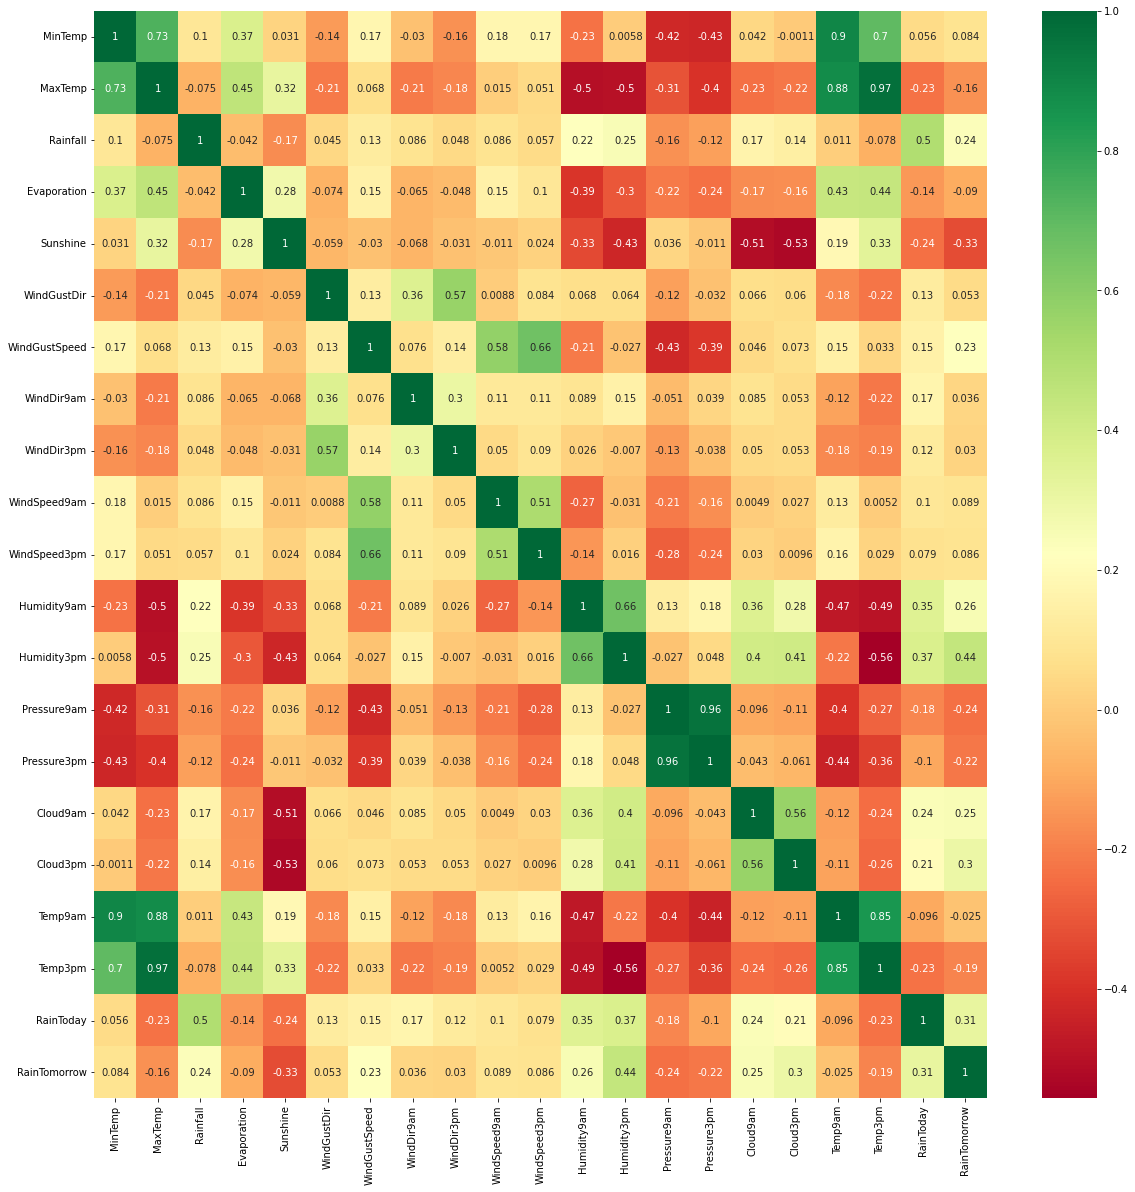

In [23]:
#feature selection berdasarkan correlation
X = df.iloc[:,0:19]  #independent columns
y = df.iloc[:,-1]    #target column

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Agar pelatihan model lebih efektif dan efisien, maka dilakukan feature selection pada dataset.  Feature selection dilakukan berdasarkan korelasi antar variabel prediktor dengan variabel target yaitu RainTomorrow

Berdasarkan Heat Map tersebut, variabel Sunshine memiliki korelasi yang cukup tinggi dengan RainTomorrow (korelasi negatif), Humidity serta RainToday juga berpengaruh besar terhadap variabel RainTomorrow

In [24]:
#drop feature yang korelasi nya kurang dari 0.1
df.drop(['MinTemp', 'Evaporation', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am'], axis=1 , inplace=True)

Variabel diatas memiliki korelasi/pengaruh < 0.1 terhadap variabel target, sehingga kami memutuskan untuk tidak mengikutsertakan variabel tersebut saat pelatihan model

In [25]:
#data frame after feature selection
df

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,0.6,8.5,44.0,71.0,22.0,1007.7,1007.1,8.0,5.0,21.8,0.0,0.0
1,25.1,0.0,8.5,44.0,44.0,25.0,1010.6,1007.8,5.0,5.0,24.3,0.0,0.0
2,25.7,0.0,8.5,46.0,38.0,30.0,1007.6,1008.7,5.0,2.0,23.2,0.0,0.0
3,28.0,0.0,8.5,24.0,45.0,16.0,1017.6,1012.8,5.0,5.0,26.5,0.0,0.0
4,32.3,1.0,8.5,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,21.8,0.0,8.5,31.0,59.0,27.0,1024.7,1021.2,5.0,5.0,20.9,0.0,0.0
145455,23.4,0.0,8.5,31.0,51.0,24.0,1024.6,1020.3,5.0,5.0,22.4,0.0,0.0
145456,25.3,0.0,8.5,22.0,56.0,21.0,1023.5,1019.1,5.0,5.0,24.5,0.0,0.0
145457,26.9,0.0,8.5,37.0,53.0,24.0,1021.0,1016.8,5.0,5.0,26.1,0.0,0.0


In [26]:
#split data for train and test data
y = df.iloc[:,-1]
X = df.iloc[:,0:12]

In [27]:
#20% data test dan 80% data train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

## Modelling

Model yang akan digunakan untuk Klasifikasi Hujan ini adalah Logistic Regression dan SVM.

In [28]:
#bulding and fitting Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [29]:
#check for accuracy Logistic Regression model with test data
print('Test data accuracy', model.score(X_test, y_test))

Test data accuracy 0.8388024717664607


akurasi model Logistic Regression 83,88%

In [30]:
#building SVM model
svm_model = SVC()

In [31]:
#fitting SVM model
svm_model.fit(X_train, y_train)

SVC()

In [32]:
#check for accuracy SVM model with test data
print('Test data accuracy', svm_model.score(X_test, y_test))

Test data accuracy 0.837133319127779


## Evaluasi Model

In [33]:
#check for confusion matrix Logistic Regression Model
pred_test = model.predict(X_test)
print(accuracy_score(y_test, pred_test))
matrix = confusion_matrix(y_test, pred_test)
print(matrix)

0.8388024717664607
[[20745  1173]
 [ 3366  2874]]


<function matplotlib.pyplot.show(*args, **kw)>

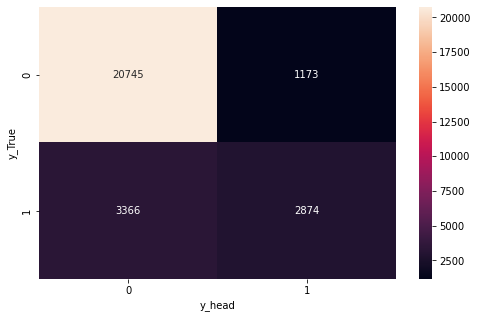

In [34]:
#visualize the confusion matrix Logistic Regression Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [35]:
#check for confusion matrix SVM Model
pred1_test = svm_model.predict(X_test)
print(accuracy_score(y_test, pred1_test))
matrix_svm = confusion_matrix(y_test, pred1_test)
print(matrix_svm)

0.837133319127779
[[21198   720]
 [ 3866  2374]]


<function matplotlib.pyplot.show(*args, **kw)>

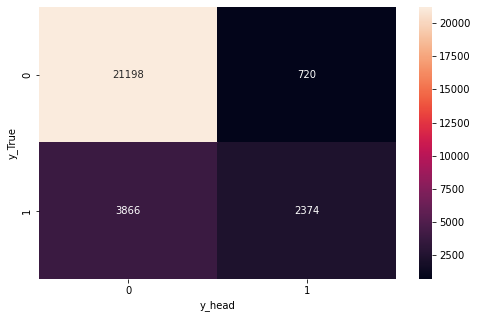

In [36]:
#visualize the confusion matrix SVM Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix_svm, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [37]:
#Metrics Performance for Logistic Regression Model
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     21918
         1.0       0.71      0.46      0.56      6240

    accuracy                           0.84     28158
   macro avg       0.79      0.70      0.73     28158
weighted avg       0.83      0.84      0.83     28158



In [38]:
#Metrics Performance for Logistic Regression Model
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     21918
         1.0       0.77      0.38      0.51      6240

    accuracy                           0.84     28158
   macro avg       0.81      0.67      0.71     28158
weighted avg       0.83      0.84      0.82     28158



Berdasarkan Metrics Performence untuk Logistic Regression dan SVM model, keduanya memberikan nilai yang sangat bagus serta kedua model tersebut memiliki akurasi yang tidak jauh berbeda. 

Akurasi kedua model tersebut berada pada nilai 84%, sehingga untuk memprediksi kejadian Hujan untuk selanjutnya bisa menggunakan SVM atau Logistic Regression tergantung kebutuhan, karena keduanya menghasilkan tingkat akurasi model yang nilainya hampir sama